# Problem Set 4 - Solutions
### Heather Chen
### 2.1

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time

In [2]:
A = 1 
alpha = 0.35
beta = 0.442 
delta = 0.6415 
sigma = 3 
labor = np.array([1, 1, 0.2]) 
SS_tol = 1e-9 
f_params = (labor, A, alpha, delta)

In [3]:
get_r = lambda K, L, alpha, delta, A : A * alpha * ((L / K) ** (1 - alpha)) - delta
get_w = lambda K, L, alpha, A: A * (1 - alpha) * ((K / L) ** alpha)
get_K = lambda b2, b3: b2+b3
get_cons = lambda b_s, b_s_1, n_s, r, w: w * n_s + (1 + r) * b_s - b_s_1
get_util = lambda c, sigma=3: (c ** (1-sigma))/(1-sigma)
get_MU = lambda c, sigma=3: c ** (-sigma)
get_Y = lambda K, L, alpha, A: A * (K ** alpha) * (L ** (1-alpha))

In [4]:
def feasible(f_params, bvec_guess):
    labor, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    K = b2 + b3
    L = np.sum(labor)
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    
    c1 = get_cons(0, b2, labor[0], r, w)
    c2 = get_cons(b2, b3, labor[1], r, w)
    c3 = get_cons(b3, 0, labor[2], r, w)
    
    b_cnstr = np.zeros(2, dtype = 'bool')
    c_cnstr = np.zeros(3, dtype = 'bool')
    K_cnstr = ((b2 + b3)<=0)
    
    c_cnstr[0], c_cnstr[1], c_cnstr[2] = (c1<=0), (c2<=0), (c3<=0)
    
    if c_cnstr[0]:
        b_cnstr[0] = 1
    if c_cnstr[1]:
        b_cnstr[0], b_cnstr[1] = 1, 1
    if c_cnstr[2]:
        b_cnstr[1] = 1
        
    return b_cnstr, c_cnstr, K_cnstr

#### a. 

In [5]:
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print("b_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr)
print("K_cnstr:", K_cnstr)

b_cnstr: [ True False]
c_cnstr: [ True False False]
K_cnstr: False


The consumption nonnegativity assumption is violated.
#### b.

In [6]:
bvec_guess = np.array([0.06, -0.001])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print(b_cnstr, c_cnstr, K_cnstr)

[False False] [False False False] False


#### c.

In [7]:
bvec_guess = np.array([0.1, 0.1])
b_cnstr, c_cnstr, K_cnstr = feasible(f_params, bvec_guess)
print("b_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr)
print("K_cnstr:", K_cnstr)

b_cnstr: [False False]
c_cnstr: [False False False]
K_cnstr: False


### 2.2
#### a. 

In [11]:
def EulEqs(bvec, f_params):
    labor, A, alpha, delta, beta = f_params
    b2, b3 = bvec
    L = labor.sum()
    K = get_K(b2, b3)
    r = get_r(K, L, alpha, delta, A)
    w = get_w(K, L, alpha, A)
    c1 = get_cons(0, b2, labor[0], r, w)
    c2 = get_cons(b2, b3, labor[1], r, w)
    c3 = get_cons(b3, 0, labor[2], r, w)
    MU1, MU2, MU3 = get_MU(c1), get_MU(c2), get_MU(c3)
    Eul1 = MU1 - beta*(1+r) * MU2
    Eul2 = MU2 - beta*(1+r) * MU3
    return np.array([Eul1, Eul2])

In [12]:

def get_SS(params, bvec_guess, SS_graphs = False):
    start_time = time.clock()
    beta, sigma, labor, L, A, alpha, delta, SS_tol = params
    f_params = np.array([labor, A, alpha, delta, beta])
    b_ss = opt.root(EulEqs, bvec_guess, args = (f_params)).x
    b2, b3 = b_ss
    K_ss = get_K(b2, b3)
    r_ss = get_r(K_ss, L, alpha, delta, A)
    Y_ss = get_Y(K_ss, L, alpha, A)
    w_ss = get_w(K_ss, L, alpha, A)
    c1 = get_cons(0, b2, labor[0], r_ss, w_ss)
    c2 = get_cons(b2, b3, labor[1], r_ss, w_ss)
    c3 = get_cons(b3, 0, labor[2], r_ss, w_ss)
    c_ss = np.array([c1, c2, c3])
    C_ss = c_ss.sum()
    EulErr_ss = EulEqs(b_ss, f_params)
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    ss_time = time.clock() - start_time
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    
    if SS_graphs:
        plt.style.use('ggplot')
        fig, ax = plt.subplots()
        ax.plot(np.arange(1,4), c_ss, marker = 'o', label = 'consumptions')
        ax.plot(np.arange(2,4), b_ss, marker = 'o', label = 'savings')
        ax.legend()
        ax.set_title('Steady-state Distribution of Consumptions and Savings by Age')
        plt.show()
        
    return ss_output

In [13]:
params = [beta, sigma, labor, labor.sum(), A, alpha, delta, SS_tol]
bvec_guess = np.array([0.1, 0.1])
ss_output = get_SS(params, bvec_guess)

/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [14]:
print('Savings:',ss_output['b_ss'])
print('Consumptions:',ss_output['c_ss'])
print('Wage:',ss_output['w_ss'])
print('Interest rate:',ss_output['r_ss'])
print('Capital:',ss_output['K_ss'])
print('Output:',ss_output['Y_ss'])
print('Total consumption:',ss_output['C_ss'])
print('Euler errors:',ss_output['EulErr_ss'])
print('Resource constraint error:',ss_output['RCerr_ss'])
print('Computation time:', round(ss_output['ss_time'], 6), 'seconds')

Savings: [0.01931253 0.0584111 ]
Consumptions: [0.18241213 0.20961468 0.24087387]
Wage: 0.20172465739052575
Interest rate: 2.433062339127069
Capital: 0.07772362575316386
Output: 0.6827603788602411
Total consumption: 0.6329006729395864
Euler errors: [-1.39266376e-12  2.62900812e-12]
Resource constraint error: 8.326672684688674e-17
Computation time: 0.000654 seconds


#### b. 

/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


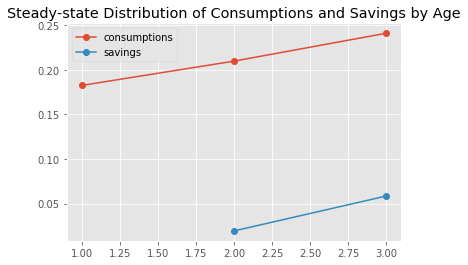

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0006550000000000722}

In [15]:
get_SS(params, bvec_guess, True)

#### c.

In [16]:
params2 = [0.55, sigma, labor, labor.sum(), A, alpha, delta, SS_tol]
ss_output2 = get_SS(params2, bvec_guess)
print('Savings:', ss_output2['b_ss'], '// Previous:', ss_output['b_ss'])
print('Consumptions:', ss_output2['c_ss'], '// Previous:', ss_output['c_ss'])
print('Wage:',ss_output2['w_ss'], '// Previous:', ss_output['w_ss'])
print('Interest rate:',ss_output2['r_ss'], '// Previous', ss_output['r_ss'])

Savings: [0.02817692 0.07686545] // Previous: [0.01931253 0.0584111 ]
Consumptions: [0.19597528 0.22861594 0.26669307] // Previous: [0.18241213 0.20961468 0.24087387]
Wage: 0.22415219593446706 // Previous: 0.20172465739052575
Interest rate: 1.8863765057189819 // Previous 2.433062339127069


/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/Users/heatherchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


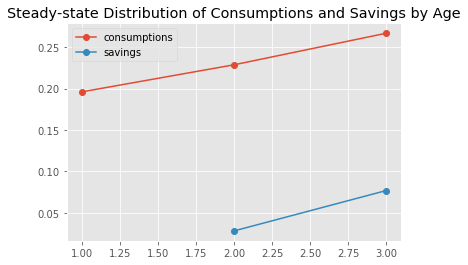

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0005220000000001335}

In [17]:
get_SS(params2, bvec_guess, True)

Compared with results in b., the insterest rate decreases, and the value of consumption, savings, as well as wage increases. 

Intuition: When the value of beta increases, people are incentivized to save more. The increase of savings leads to larger capital accumulation, thus higher return to capital. These will ultimately lead to the increase in wages as well as consumption.

### 2.3
#### a.

In [19]:
def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, labor, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], labor.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], labor.sum(), alpha, delta, A)
    return path

In [20]:
def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, labor = args
    b2, b3 = bvec
    L = labor.sum()
    K = get_K(b2, b3)
    c1 = get_cons(0, b2, labor[0], r2, w1)
    c2 = get_cons(b2, b3, labor[1], r2, w2)
    c3 = get_cons(b3, 0, labor[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs

In [21]:
def solve_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, labor, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, labor = args
        c2  = get_cons(b21, b32, labor[1], r2, w2)
        c3  = get_cons(b32, 0, labor[2], r3, w3)
        MU2 = get_MU(c2)
        MU3 = get_MU(c3)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, labor)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, labor)
        bvec_ts = opt.root(EulErr, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

In [22]:
def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, labor, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = solve_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, labor, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        '''
        if the initial epsilon is larger than the tolerance
        we update the time path and calculated time path and recalculate the epsilon
        '''
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, labor, m, "update")
            b_HH = solve_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, labor, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, "       difference: ", diff)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

In [23]:
xival = 0.1
tol = 1e-9
bvec_init = np.array([0.8 * ss_output['b_ss'][0], 1.1 * ss_output['b_ss'][1]])
T = 25
m = 25
bvec_ss = ss_output['b_ss']
K_ss = ss_output['K_ss']
K_init = bvec_init.sum()
path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, labor, m, "linear")

In [24]:
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, labor, bvec_ss, K_ss)

iteration:  1        difference:  0.0026923268543442304
iteration:  2        difference:  0.002157561740107384
iteration:  3        difference:  0.0017408174700849325
iteration:  4        difference:  0.0014142121894262733
iteration:  5        difference:  0.0011567365684827385
iteration:  6        difference:  0.0009525098783005804
iteration:  7        difference:  0.0007894893845593562
iteration:  8        difference:  0.0006585123205853974
iteration:  9        difference:  0.0005525827671266743
iteration:  10        difference:  0.0004663394689037951
iteration:  11        difference:  0.00039565771612220233
iteration:  12        difference:  0.0003373508229514696
iteration:  13        difference:  0.00028894577394323863
iteration:  14        difference:  0.00024851422573664284
iteration:  15        difference:  0.00021454491036903037
iteration:  16        difference:  0.00018584706684335225
iteration:  17        difference:  0.00016147717292832388
iteration:  18        difference:  

In [25]:
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

In [26]:
Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, labor.sum(), alpha, A)
    c1t = get_cons(0, b2t, labor[0], rt, wt)
    c2t = get_cons(b2t1, b3t, labor[1], rt1, wt)
    c3t = get_cons(b3t1, 0, labor[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = EulErr(b_path[i, :], w_path[i,1], w_path[i+1,1], 
                               w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], 
                               beta, alpha, delta, sigma, A, labor)

In [28]:
print('Maximum of the absolute values of all the Euler errors:', np.abs(Eulerr_path).max())
print('Maximum of the absolute values of all the resource constraint errors:', np.abs(RCerr_path).max())

Maximum of the absolute values of all the Euler errors: 37.40392775466482
Maximum of the absolute values of all the resource constraint errors: 0.0057734276923919435


#### b.

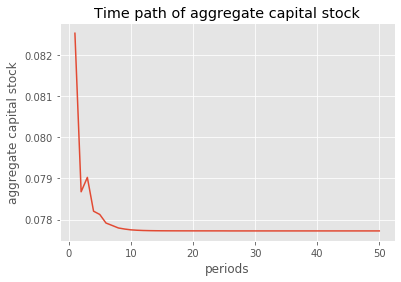

In [29]:
K_fig = plt.figure()
plt.plot(K_path[: , 0], K_path[: , 1])
plt.xlabel('periods')
plt.ylabel('aggregate capital stock')
plt.title('Time path of aggregate capital stock')
plt.show()

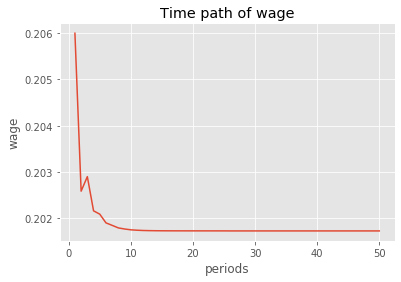

In [31]:
w_fig = plt.figure()
plt.plot(w_path[: , 0], w_path[: , 1])
plt.xlabel('periods')
plt.ylabel('wage')
plt.title('Time path of wage')
plt.show()

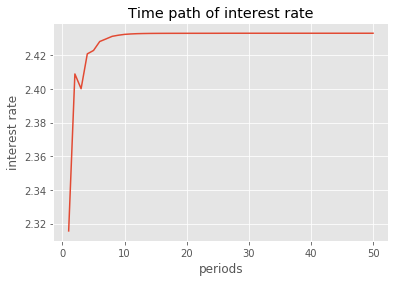

In [32]:
r_fig = plt.figure()
plt.plot(r_path[: , 0], r_path[: , 1])
plt.xlabel('periods')
plt.ylabel('interest rate')
plt.title('Time path of interest rate')
plt.show()

#### c. 

In [33]:
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 0.00001:
        print('Time to get within 0.00001: {} periods '.format(int(K_path[i, 0])))
        break

Time to get within 0.00001: 13 periods 


In [34]:
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print(" After period {}, the aggregate capital stock never is again farther than 0.00001 away from the steady-state.".format(int(K_path[i, 0])))
        break

 After period 13, the aggregate capital stock never is again farther than 0.00001 away from the steady-state.
